In [52]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('/content/train.csv')
df.head()

,id,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,...,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit,result
0,a563699ca2a601c6ac64aa29986a00a90fb42b48741695...,catA_1,catB_0,catC_718,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_6,0.000458
1,91ab3eb3bcf6c8c1c5fe2da9ba671aa5a48c7369d9a50f...,catA_1,catB_0,catC_1309,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_6,0.000335
2,7128c51c554735d6c81862684ad6005ae12d2edbcd4644...,catA_15,catB_0,catC_1309,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_4,0.054072
3,c8144b52e4f63014de0a0d8e1c629bf0b05cb2696cfc23...,catA_0,catB_0,catC_935,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_5,0.061143
4,88d15a5b2df6692f23d105ff1ae82ae026be00c9271eef...,catA_22,catB_0,catC_1325,catD_0,catE_2,catF_0,-40055.250,4.363288,0.729194,...,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,unit_15,0.015439


In [54]:
df.shape

(13000, 28)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            13000 non-null  object 
 1   categoryA     13000 non-null  object 
 2   categoryB     13000 non-null  object 
 3   categoryC     13000 non-null  object 
 4   categoryD     13000 non-null  object 
 5   categoryE     13000 non-null  object 
 6   categoryF     13000 non-null  object 
 7   featureA      12936 non-null  float64
 8   featureB      12936 non-null  float64
 9   featureC      12936 non-null  float64
 10  featureD      12936 non-null  float64
 11  featureE      12936 non-null  float64
 12  featureF      13000 non-null  float64
 13  featureG      12936 non-null  float64
 14  featureH      12936 non-null  float64
 15  featureI      12936 non-null  float64
 16  compositionA  12936 non-null  float64
 17  compositionB  12936 non-null  float64
 18  compositionC  12936 non-nu

In [56]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

featureA        64
featureB        64
featureC        64
featureD        64
featureE        64
featureG        64
featureH        64
featureI        64
compositionA    64
compositionB    64
compositionC    64
compositionD    64
compositionE    64
compositionF    64
compositionG    64
compositionH    64
compositionI    64
compositionJ    64
dtype: int64


In [57]:
df.describe() 

,featureA,featureB,featureC,featureD,featureE,featureF,featureG,featureH,featureI,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,result
count,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,13000.000000,1.293600e+04,12936.000000,1.293600e+04,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,13000.000000
mean,116559.238066,4.526278,0.132972,150.341104,26.446181,0.217538,2.335365e+12,15.047186,5.020210e+07,0.164923,7.708228,23.627522,1.296887,32.038122,3.178698,2.024316,11.214700,23.386089,18.942594,0.144223
std,146502.011917,3.180817,0.264148,75.093666,6.665619,2.380893,8.937298e+11,32.000372,2.412360e+07,0.743228,3.208687,6.433507,3.724154,11.098175,1.098585,2.964965,4.860118,5.937944,4.096265,0.224062
min,-83749.750000,1.064468,0.000000,18.148547,3.875411,0.000000,2.887150e+10,0.000000,5.300380e+05,0.000000,2.200000,0.000000,0.000000,12.780000,1.380000,0.000000,1.450000,0.760000,6.100000,0.000000
25%,56744.750000,4.363288,0.005718,122.299437,24.625503,0.000000,1.464509e+12,0.000000,2.586796e+07,0.000000,5.830000,17.700000,0.000000,30.000000,3.000000,0.000000,9.000000,22.260000,18.900000,0.003875
50%,75808.375000,4.457840,0.005718,122.299437,30.831906,0.000000,2.806036e+12,0.000000,5.094169e+07,0.000000,10.000000,26.000000,0.000000,32.000000,3.000000,0.000000,9.000000,22.260000,20.000000,0.027909
75%,75808.375000,4.457840,0.032407,137.976566,30.831906,0.000000,2.806036e+12,0.000000,7.117635e+07,0.000000,10.000000,26.000000,1.940000,32.000000,3.000000,2.000000,12.330000,27.250000,20.000000,0.168678
max,582211.000000,25.982190,0.729194,511.475928,38.767234,100.000000,3.781699e+12,87.158924,7.117635e+07,4.000000,21.400000,44.050000,30.460000,62.300000,9.200000,7.900000,20.200000,47.830000,37.830000,1.000000


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


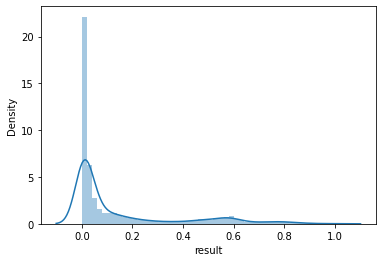



skewness: 1.671125
kurtosis: 1.590801


In [58]:
sns.distplot(df.result)
plt.show()
print('\n')
print("skewness: %f" % df['result'].skew())
print("kurtosis: %f" % df ['result'].kurt())

In [59]:
df.skew()

<ipython-input-59-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


featureA         1.306407
featureB         3.797456
featureC         1.795937
featureD         1.003517
featureE        -0.889903
featureF        31.217804
featureG        -1.312239
featureH         1.784785
featureI        -0.646499
compositionA     4.607279
compositionB    -0.802405
compositionC    -0.552444
compositionD     4.783189
compositionE     0.422508
compositionF     3.682130
compositionG     1.205124
compositionH     0.901407
compositionI     1.705621
compositionJ     1.677662
result           1.671125
dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness: -0.275546
kurtosis: -0.534419


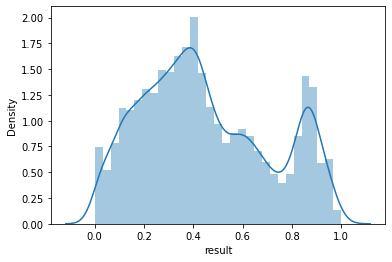

In [62]:
sns.distplot(df.result)
df['result'] = np.sqrt(df['result'])
print('skewness: %f' % df['result'].skew())
print("kurtosis: %f" % df ['result'].kurt())

In [63]:
df = df.applymap(lambda x: x.replace('catA_', '') if isinstance(x, str) else x)
df = df.applymap(lambda x: x.replace('catB_', '') if isinstance(x, str) else x)
df = df.applymap(lambda x: x.replace('catC_', '') if isinstance(x, str) else x)
df = df.applymap(lambda x: x.replace('catD_', '') if isinstance(x, str) else x)
df = df.applymap(lambda x: x.replace('catE_', '') if isinstance(x, str) else x)
df = df.applymap(lambda x: x.replace('catF_', '') if isinstance(x, str) else x)
df = df.applymap(lambda x: x.replace('unit_', '') if isinstance(x, str) else x)

# display the updated DataFrame
df.head()

,id,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,...,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit,result
0,a563699ca2a601c6ac64aa29986a00a90fb42b48741695...,1,0,718,0,0,0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,6,0.382473
1,91ab3eb3bcf6c8c1c5fe2da9ba671aa5a48c7369d9a50f...,1,0,1309,0,0,0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,6,0.367794
2,7128c51c554735d6c81862684ad6005ae12d2edbcd4644...,15,0,1309,0,0,0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,4,0.694419
3,c8144b52e4f63014de0a0d8e1c629bf0b05cb2696cfc23...,0,0,935,0,0,0,75808.375,4.457840,0.005718,...,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,5,0.705169
4,88d15a5b2df6692f23d105ff1ae82ae026be00c9271eef...,22,0,1325,0,2,0,-40055.250,4.363288,0.729194,...,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,15,0.593715


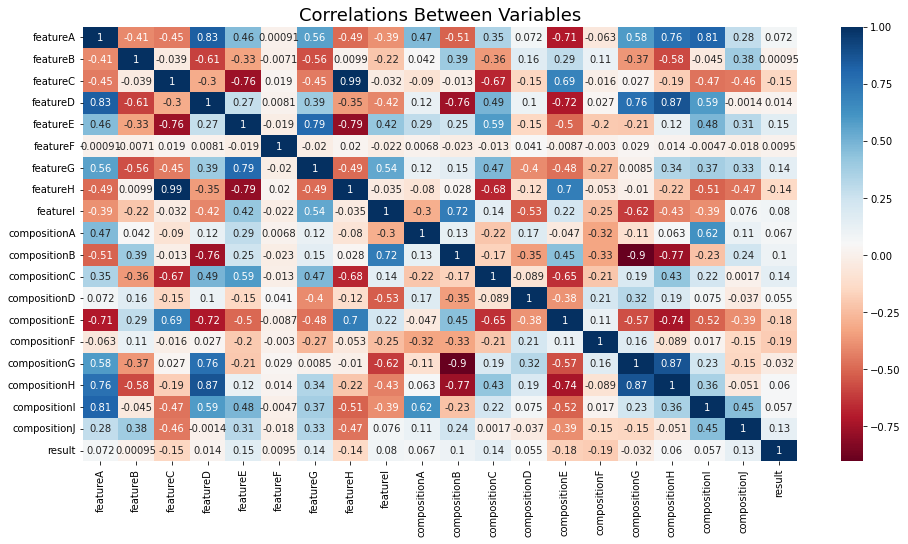

In [64]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=18)
plt.show()

In [65]:
df = df.drop(['id','featureD','featureG','featureH','featureI','featureF','compositionG','compositionI'],axis=1)

In [66]:
df.shape

(13000, 20)

In [67]:
num=df._get_numeric_data() 
num=num.astype('float')
num.head()

,featureA,featureB,featureC,featureE,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionH,compositionJ,result
0,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0.382473
1,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0.367794
2,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0.694419
3,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0.705169
4,-40055.250,4.363288,0.729194,15.047884,0.0,8.0,14.0,0.0,49.0,3.0,9.0,15.0,0.593715


In [68]:
cat=df.drop(num,axis=1)
cat=cat.astype('category')
cat.head()

,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,unit
0,1,0,718,0,0,0,6
1,1,0,1309,0,0,0,6
2,15,0,1309,0,0,0,4
3,0,0,935,0,0,0,5
4,22,0,1325,0,2,0,15


In [69]:
cat.nunique(axis=0)

categoryA     167
categoryB       2
categoryC    2212
categoryD       3
categoryE      25
categoryF       3
unit           19
dtype: int64

In [70]:
num.isnull().sum()

featureA        64
featureB        64
featureC        64
featureE        64
compositionA    64
compositionB    64
compositionC    64
compositionD    64
compositionE    64
compositionF    64
compositionH    64
compositionJ    64
result           0
dtype: int64

In [71]:
cat.isnull().sum()

categoryA    0
categoryB    0
categoryC    0
categoryD    0
categoryE    0
categoryF    0
unit         0
dtype: int64

In [72]:
num.isnull().sum()

featureA        64
featureB        64
featureC        64
featureE        64
compositionA    64
compositionB    64
compositionC    64
compositionD    64
compositionE    64
compositionF    64
compositionH    64
compositionJ    64
result           0
dtype: int64

In [73]:
num['featureA'].median()
num['featureA'].fillna(num['featureA'].median(),inplace=True)
num['featureB'].median()
num['featureB'].fillna(num['featureB'].median(),inplace=True)
num['featureC'].median()
num['featureC'].fillna(num['featureC'].median(),inplace=True)
num['featureE'].median()
num['featureE'].fillna(num['featureE'].median(),inplace=True)
num['compositionA'].median()
num['compositionA'].fillna(num['compositionA'].median(),inplace=True)
num['compositionB'].median()
num['compositionB'].fillna(num['compositionB'].median(),inplace=True)
num['compositionC'].median()
num['compositionC'].fillna(num['compositionC'].median(),inplace=True)
num['compositionD'].median()
num['compositionD'].fillna(num['compositionD'].median(),inplace=True)
num['compositionE'].median()
num['compositionE'].fillna(num['compositionE'].median(),inplace=True)
num['compositionF'].median()
num['compositionF'].fillna(num['compositionF'].median(),inplace=True)
num['compositionH'].median()
num['compositionH'].fillna(num['compositionH'].median(),inplace=True)
num['compositionJ'].median()
num['compositionJ'].fillna(num['compositionJ'].median(),inplace=True)

In [74]:
num.isnull().sum()

featureA        0
featureB        0
featureC        0
featureE        0
compositionA    0
compositionB    0
compositionC    0
compositionD    0
compositionE    0
compositionF    0
compositionH    0
compositionJ    0
result          0
dtype: int64

In [75]:
cat = cat.astype({'categoryA':'category', 'categoryB': 'category','categoryC':'category','categoryD':'category','categoryE':'category','categoryF':'category','unit':'category'})
cat.dtypes

categoryA    category
categoryB    category
categoryC    category
categoryD    category
categoryE    category
categoryF    category
unit         category
dtype: object

In [76]:
cat = cat.astype({'categoryA':'float', 'categoryB': 'float','categoryC':'float','categoryD':'float','categoryE':'float','categoryF':'float','unit':'float'})
cat.dtypes

categoryA    float64
categoryB    float64
categoryC    float64
categoryD    float64
categoryE    float64
categoryF    float64
unit         float64
dtype: object

In [77]:
cat.head()

,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,unit
0,1.0,0.0,718.0,0.0,0.0,0.0,6.0
1,1.0,0.0,1309.0,0.0,0.0,0.0,6.0
2,15.0,0.0,1309.0,0.0,0.0,0.0,4.0
3,0.0,0.0,935.0,0.0,0.0,0.0,5.0
4,22.0,0.0,1325.0,0.0,2.0,0.0,15.0


In [78]:
cat.isnull().sum()

categoryA    0
categoryB    0
categoryC    0
categoryD    0
categoryE    0
categoryF    0
unit         0
dtype: int64

In [79]:
final_df = num.join(cat)
final_df.head()

,featureA,featureB,featureC,featureE,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionH,compositionJ,result,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,unit
0,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0.382473,1.0,0.0,718.0,0.0,0.0,0.0,6.0
1,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0.367794,1.0,0.0,1309.0,0.0,0.0,0.0,6.0
2,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0.694419,15.0,0.0,1309.0,0.0,0.0,0.0,4.0
3,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0.705169,0.0,0.0,935.0,0.0,0.0,0.0,5.0
4,-40055.250,4.363288,0.729194,15.047884,0.0,8.0,14.0,0.0,49.0,3.0,9.0,15.0,0.593715,22.0,0.0,1325.0,0.0,2.0,0.0,15.0


In [80]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   featureA      13000 non-null  float64
 1   featureB      13000 non-null  float64
 2   featureC      13000 non-null  float64
 3   featureE      13000 non-null  float64
 4   compositionA  13000 non-null  float64
 5   compositionB  13000 non-null  float64
 6   compositionC  13000 non-null  float64
 7   compositionD  13000 non-null  float64
 8   compositionE  13000 non-null  float64
 9   compositionF  13000 non-null  float64
 10  compositionH  13000 non-null  float64
 11  compositionJ  13000 non-null  float64
 12  result        13000 non-null  float64
 13  categoryA     13000 non-null  float64
 14  categoryB     13000 non-null  float64
 15  categoryC     13000 non-null  float64
 16  categoryD     13000 non-null  float64
 17  categoryE     13000 non-null  float64
 18  categoryF     13000 non-nu

In [81]:
final_df.shape

(13000, 20)

In [82]:
X = final_df.drop(['result'],axis=1)
y = final_df.drop(X,axis=1)

In [83]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
X_train = np.concatenate([np.ones((len(X_train), 1)), X_train], axis=1)
X_test = np.concatenate([np.ones((len(X_test), 1)), X_test], axis=1)

In [84]:
def polynomial_regression(X_train, y_train, degree):

    X = np.asarray(X_train)
    y = np.asarray(y_train)
    A = np.zeros((degree + 1, degree + 1))
    b = np.zeros(degree + 1)
    for i in range(degree + 1):
        for j in range(degree + 1):
            A[i, j] = np.sum(X**(i+j))
        b[i] = np.sum(y * X**i)
    coeffs = np.linalg.solve(A, b)
    return tuple(coeffs[::-1])


In [85]:
degree = 3
coeffs = polynomial_regression(X_train, y_train, degree)
print(f"Fitted coefficients: {coeffs}")


Fitted coefficients: (3.4240556940275703e-18, -2.8330107730099488e-12, 5.823608096264792e-07, 0.6417252937406267)


In [86]:
# Generate test data
n_test_samples = 100
X_train = np.linspace(0, 1, n_test_samples)
y_test = np.sin(2 * np.pi * X_train)

# Make predictions on test data
y_pred = np.polyval(coeffs, X_train)


In [87]:
print('R^2 score:', 1 - np.sum((X_train - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

R^2 score: 0.7876709547124459


In [111]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range of degrees to consider
degree_range = range(1, 11)

# Define the range of alpha values to consider
alpha_range = [0.01, 0.1, 1, 10]

# Initialize variables to keep track of best parameters and lowest validation error
best_degree = None
best_alpha = None
lowest_error = float('inf')

# Loop over all possible combinations of degree and alpha
for degree in degree_range:
    for alpha in alpha_range:
        
        # Create polynomial features for the training and validation sets
        X_train_poly = np.hstack((X_train ** d for d in range(1, degree+1)))
        X_val_poly = np.hstack((X_val ** d for d in range(1, degree+1)))
        
        # Add a column of ones to the training and validation sets to represent the bias term
        X_train_poly = np.hstack((np.ones((X_train.shape[0], 1)), X_train_poly))
        X_val_poly = np.hstack((np.ones((X_val.shape[0], 1)), X_val_poly))
        
        # Calculate the weights for the polynomial regression model using Ridge regression
        A = alpha * np.eye(X_train_poly.shape[1])
        A[0, 0] = 0
        w = np.linalg.solve(np.dot(X_train_poly.T, X_train_poly) + A, np.dot(X_train_poly.T, y_train))
        
        # Calculate the mean squared error on the validation set
        y_pred_val = np.dot(X_val_poly, w)
        error = np.mean((y_pred_val - y_val) ** 2)
        
        # Update the best parameters and lowest validation error if necessary
        if error < lowest_error:
            best_degree = degree
            best_alpha = alpha
            lowest_error = error
            
# Print the best parameters and lowest validation error
print(f'Best degree: {best_degree}')
print(f'Best alpha: {best_alpha}')
print(f'Lowest validation error: {lowest_error}')

Best degree: 3
Best alpha: 1
Lowest validation error: 0.20905972975678216


<ipython-input-111-8992f815494c>:25: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_train_poly = np.hstack((X_train ** d for d in range(1, degree+1)))
<ipython-input-111-8992f815494c>:26: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_val_poly = np.hstack((X_val ** d for d in range(1, degree+1)))


In [89]:
best_degree = 3
best_alpha = 1

In [91]:
# create polynomial features up to the best degree
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X_train,y_train)

# add column of ones for bias term
X_poly = np.concatenate((np.ones((X_poly.shape[0], 1)), X_poly), axis=1)

# initialize weights to zero
weights = np.zeros(X_poly.shape[1])

# define learning rate and number of epochs
learning_rate = 0.001
num_epochs = 10000

# perform gradient descent to optimize weights
for i in range(num_epochs):
    y_pred = np.dot(X_poly, weights)
    error = y_pred - y_train
    weights -= learning_rate * (np.dot(X_poly.T, error) + 2 * best_alpha * weights) / len(y_train)
    
# create a function to make predictions on new data
def predict(X_val):
    X_new_poly = poly_features.transform(X_val)
    X_new_poly = np.concatenate((np.ones((X_new_poly.shape[0], 1)), X_new_poly), axis=1)
    return np.dot(X_new_poly, weights)

In [92]:
pred = predict(X_val)
pred

array([ 0.83570051,  3.19204221,  1.99039997,  1.2310214 ,  4.86488324,
        1.41333631,  1.07736253,  0.69843181,  0.77019565,  2.59135491,
        1.81798834,  0.96991221, 11.41422352,  2.43393242,  1.14503325,
        0.69264876,  1.12145986,  0.68235732,  1.5548038 , 15.05458667])

In [93]:
mse = np.mean((pred - y_val)**2)
mae = np.mean(np.abs(pred - y_val))
r2 = 1 - np.sum((pred - y_val)**2) / np.sum((y_val - np.mean(y_val))**2)
print('MSE:', mse)
print('MAE:', mae)
print('r2_score:', r2)

MSE: 0.2071585385809326
MAE: 0.3543588842317536
r2_score: 0.9850501033207123


In [94]:
test=pd.read_csv("/content/test.csv")
test.head()

,id,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,...,compositionB,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit
0,939edadbc8e0cddf21c8c5710c4f2f909abd36c196aee8...,catA_6,catB_0,catC_55,catD_0,catE_1,catF_0,325435.125,1.728675,0.032407,...,2.2,28.2,2.7,16.7,3.5,7.6,20.2,27.25,18.9,unit_7
1,fcfed000585350fdc6a982bd1146cd8cdd71d989a2fb01...,catA_6,catB_0,catC_1638,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_7
2,917b412b73b7c1c83f779d2f350acda4d2b14804579e79...,catA_17,catB_0,catC_1400,catD_0,catE_16,catF_0,-19688.875,25.982190,0.000000,...,21.4,9.7,0.0,46.7,2.6,2.4,7.7,21.23,6.1,unit_12
3,012d646dbd712fd4b752aa8761dc18aaf28643c262f859...,catA_5,catB_0,catC_204,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,...,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_0
4,77c69c2a873444dfef22131bada7d9504ad731ca8df55d...,catA_5,catB_0,catC_1282,catD_0,catE_2,catF_0,-40055.250,4.363288,0.729194,...,8.0,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,unit_0


In [96]:
test = test.astype({'categoryA':'category', 'categoryB': 'category','categoryC':'category','categoryD':'category','categoryE':'category','categoryF':'category','unit':'category'})
test.dtypes

id                object
categoryA       category
categoryB       category
categoryC       category
categoryD       category
categoryE       category
categoryF       category
featureA         float64
featureB         float64
featureC         float64
featureD         float64
featureE         float64
featureF         float64
featureG         float64
featureH         float64
featureI         float64
compositionA     float64
compositionB     float64
compositionC     float64
compositionD     float64
compositionE     float64
compositionF     float64
compositionG     float64
compositionH     float64
compositionI     float64
compositionJ     float64
unit            category
dtype: object

In [97]:
test = test.applymap(lambda x: x.replace('catA_', '') if isinstance(x, str) else x)
test = test.applymap(lambda x: x.replace('catB_', '') if isinstance(x, str) else x)
test = test.applymap(lambda x: x.replace('catC_', '') if isinstance(x, str) else x)
test = test.applymap(lambda x: x.replace('catD_', '') if isinstance(x, str) else x)
test = test.applymap(lambda x: x.replace('catE_', '') if isinstance(x, str) else x)
test = test.applymap(lambda x: x.replace('catF_', '') if isinstance(x, str) else x)
test = test.applymap(lambda x: x.replace('unit_', '') if isinstance(x, str) else x)


In [98]:
test.isnull().sum()

id               0
categoryA        0
categoryB        0
categoryC        0
categoryD        0
categoryE        0
categoryF        0
featureA        43
featureB        43
featureC        43
featureD        43
featureE        43
featureF         0
featureG        43
featureH        43
featureI        43
compositionA    43
compositionB    43
compositionC    43
compositionD    43
compositionE    43
compositionF    43
compositionG    43
compositionH    43
compositionI    43
compositionJ    43
unit             0
dtype: int64

In [99]:
test.corr()

,featureA,featureB,featureC,featureD,featureE,featureF,featureG,featureH,featureI,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ
featureA,1.000000,-0.408137,-0.426890,0.809118,0.407637,NaN,0.556711,-0.477954,-0.259755,0.324388,-0.492721,0.386913,0.086680,-0.709714,-0.014101,0.579534,0.741528,0.735158,0.264225
featureB,-0.408137,1.000000,-0.064387,-0.579826,-0.309620,NaN,-0.587289,0.010486,-0.306559,0.194258,0.411850,-0.440555,0.047383,0.337360,0.005652,-0.268290,-0.495614,-0.114603,0.218968
featureC,-0.426890,-0.064387,1.000000,-0.272477,-0.653870,NaN,-0.340448,0.987812,0.005742,-0.085606,-0.009857,-0.601298,-0.158846,0.623866,-0.005775,0.005863,-0.177854,-0.431437,-0.401511
featureD,0.809118,-0.579826,-0.272477,1.000000,0.281237,NaN,0.375161,-0.331729,-0.310677,0.019785,-0.717616,0.541227,0.118149,-0.683623,0.029940,0.654715,0.826683,0.568448,-0.012582
featureE,0.407637,-0.309620,-0.653870,0.281237,1.000000,NaN,0.736494,-0.698414,0.477478,0.160056,0.186507,0.566357,-0.204000,-0.408847,-0.169681,-0.213715,0.139923,0.362700,0.197880
featureF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
featureG,0.556711,-0.587289,-0.340448,0.375161,0.736494,NaN,1.000000,-0.402359,0.646466,-0.004643,0.134481,0.497608,-0.350071,-0.472740,-0.234272,-0.012883,0.314582,0.307093,0.291589
featureH,-0.477954,0.010486,0.987812,-0.331729,-0.698414,NaN,-0.402359,1.000000,-0.016089,-0.050489,0.044819,-0.631290,-0.126348,0.653811,-0.055534,-0.030512,-0.201680,-0.497341,-0.426662
featureI,-0.259755,-0.306559,0.005742,-0.310677,0.477478,NaN,0.646466,-0.016089,1.000000,-0.272755,0.631034,0.191840,-0.495819,0.120812,-0.240378,-0.562276,-0.345471,-0.283682,0.109362
compositionA,0.324388,0.194258,-0.085606,0.019785,0.160056,NaN,-0.004643,-0.050489,-0.272755,1.000000,0.228701,-0.206948,0.149157,-0.000713,-0.260998,-0.080342,0.024805,0.428407,-0.041829


In [100]:
test = test.drop(['id','featureD','featureG','featureH','featureI','featureF','compositionG','compositionI'],axis=1)

In [101]:
test[test.duplicated()]
test.drop_duplicates(inplace=True)
test

,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,featureE,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionH,compositionJ,unit
0,6,0,55,0,1,0,325435.125,1.728675,0.032407,26.637511,0.0,2.2,28.2,2.7,16.7,3.5,20.2,18.9,7
1,6,0,1638,0,0,0,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,7
2,17,0,1400,0,16,0,-19688.875,25.982190,0.000000,17.510663,3.6,21.4,9.7,0.0,46.7,2.6,7.7,6.1,12
3,5,0,204,0,0,0,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0
4,5,0,1282,0,2,0,-40055.250,4.363288,0.729194,15.047884,0.0,8.0,14.0,0.0,49.0,3.0,9.0,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,5,0,524,0,2,0,-40055.250,4.363288,0.729194,15.047884,0.0,8.0,14.0,0.0,49.0,3.0,9.0,15.0,0
6996,5,0,1308,0,0,0,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0
6997,0,0,2867,0,2,0,-40055.250,4.363288,0.729194,15.047884,0.0,8.0,14.0,0.0,49.0,3.0,9.0,15.0,5
6998,5,0,2216,0,1,0,325435.125,1.728675,0.032407,26.637511,0.0,2.2,28.2,2.7,16.7,3.5,20.2,18.9,0


In [102]:
num1=test._get_numeric_data() 
num1=num.astype('float')
num1.head()

,featureA,featureB,featureC,featureE,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionH,compositionJ,result
0,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0.382473
1,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0.367794
2,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0.694419
3,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0.705169
4,-40055.250,4.363288,0.729194,15.047884,0.0,8.0,14.0,0.0,49.0,3.0,9.0,15.0,0.593715


In [103]:
num1 = num1.drop('result',axis = 1)
num1.head()

,featureA,featureB,featureC,featureE,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionH,compositionJ
0,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0
1,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0
2,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0
3,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0
4,-40055.250,4.363288,0.729194,15.047884,0.0,8.0,14.0,0.0,49.0,3.0,9.0,15.0


In [104]:
cat1=df.drop(num1,axis=1)
cat1=cat1.astype('category')
cat1 = cat1.drop('result',axis = 1)
cat1.head()

,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,unit
0,1,0,718,0,0,0,6
1,1,0,1309,0,0,0,6
2,15,0,1309,0,0,0,4
3,0,0,935,0,0,0,5
4,22,0,1325,0,2,0,15


In [105]:
cat1.isnull().sum()

categoryA    0
categoryB    0
categoryC    0
categoryD    0
categoryE    0
categoryF    0
unit         0
dtype: int64

In [106]:
num1['featureA'].median()
num1['featureA'].fillna(num1['featureA'].median(),inplace=True)
num1['featureB'].median()
num1['featureB'].fillna(num1['featureB'].median(),inplace=True)
num1['featureC'].median()
num1['featureC'].fillna(num1['featureC'].median(),inplace=True)
num1['featureE'].median()
num1['featureE'].fillna(num1['featureE'].median(),inplace=True)
num1['compositionA'].median()
num1['compositionA'].fillna(num1['compositionA'].median(),inplace=True)
num1['compositionB'].median()
num1['compositionB'].fillna(num1['compositionB'].median(),inplace=True)
num1['compositionC'].median()
num1['compositionC'].fillna(num1['compositionC'].median(),inplace=True)
num1['compositionD'].median()
num1['compositionD'].fillna(num1['compositionD'].median(),inplace=True)
num1['compositionE'].median()
num1['compositionE'].fillna(num1['compositionE'].median(),inplace=True)
num1['compositionF'].median()
num1['compositionF'].fillna(num1['compositionF'].median(),inplace=True)
num1['compositionH'].median()
num1['compositionH'].fillna(num1['compositionH'].median(),inplace=True)
num1['compositionJ'].median()
num1['compositionJ'].fillna(num1['compositionJ'].median(),inplace=True)

In [107]:
num1.isnull().sum()

featureA        0
featureB        0
featureC        0
featureE        0
compositionA    0
compositionB    0
compositionC    0
compositionD    0
compositionE    0
compositionF    0
compositionH    0
compositionJ    0
dtype: int64

In [108]:
cat1 = cat1.astype({'categoryA':'float', 'categoryB': 'float','categoryC':'float','categoryD':'float','categoryE':'float','categoryF':'float','unit':'float'})
cat1.dtypes

categoryA    float64
categoryB    float64
categoryC    float64
categoryD    float64
categoryE    float64
categoryF    float64
unit         float64
dtype: object

In [109]:
final_df1 = num1.join(cat1)
final_df1.head()

,featureA,featureB,featureC,featureE,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionH,compositionJ,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,unit
0,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,1.0,0.0,718.0,0.0,0.0,0.0,6.0
1,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,1.0,0.0,1309.0,0.0,0.0,0.0,6.0
2,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,15.0,0.0,1309.0,0.0,0.0,0.0,4.0
3,75808.375,4.457840,0.005718,30.831906,0.0,10.0,26.0,0.0,32.0,3.0,9.0,20.0,0.0,0.0,935.0,0.0,0.0,0.0,5.0
4,-40055.250,4.363288,0.729194,15.047884,0.0,8.0,14.0,0.0,49.0,3.0,9.0,15.0,22.0,0.0,1325.0,0.0,2.0,0.0,15.0


In [110]:
y_pred1 = np.polyval(coeffs, final_df1)